
# Data Cleaning and Preprocessing of Insurance Claims Dataset

## Introduction
This notebook will cover the process of cleaning and preprocessing for the insurance claims dataset. The following steps will be performed:

*1. Handling missing data*

*2. Checking for duplicates*

*3. Converting data types*

*4. Dropping unnecessary columns*

*5. Encoding categorical variables*

## Loading the Dataset

In [1]:
import pandas as pd


# Load the dataset
file_path = r'C:\Users\thobi\Downloads\Slee\insurance_claims_raw.xlsx'
insurance_data = pd.read_excel(file_path)

# Display the first few rows to inspect the dataset
insurance_data.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


## Handle Missing Data
### Checking for Missing Values

In [2]:
# Replacing '?' with NaN and checking for missing values
insurance_data.replace('?', pd.NA, inplace=True)
missing_values = insurance_data.isna().sum()

# Displaying missing values for each column
missing_values


months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            93
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## Handling Missing Values
### Numerical columns: Replacing missing values with the mean.
### Categorical columns: Replacing missing values with the most frequent value (mode).

In [3]:
# Replacing missing numerical values with the column mean
num_cols = insurance_data.select_dtypes(include=['float64', 'int64']).columns
insurance_data[num_cols] = insurance_data[num_cols].fillna(insurance_data[num_cols].mean())

# Replacing missing categorical values with the mode
cat_cols = insurance_data.select_dtypes(include=['object']).columns
insurance_data[cat_cols] = insurance_data[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))


## Checking for Duplicates

In [4]:
# Checking for duplicated rows
duplicate_rows = insurance_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


## Convert Data Types

In [5]:
# Convert 'policy_bind_date' to datetime format
insurance_data['policy_bind_date'] = pd.to_datetime(insurance_data['policy_bind_date'], errors='coerce')

# Verify the conversion
insurance_data.dtypes


months_as_customer                      int64
age                                   float64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                     float64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                         float64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

# Dropping Unnnecessary Columns

In [6]:
# Dropping irrelevant columns such as'_c39' (mostly empty)
insurance_data.drop(columns=['_c39'], inplace=True)

# Verifying the changes
insurance_data.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,NO,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


# Handling Categorical Variables

In [7]:
# Identifying categorical columns
categorical_columns = insurance_data.select_dtypes(include=['object']).columns

# Applying one-hot encoding to categorical columns
insurance_data_encoded = pd.get_dummies(insurance_data, columns=categorical_columns, drop_first=True)

# Displaying the first few rows of the encoded dataset
insurance_data_encoded.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_Y
0,328,48.0,521585,2014-10-17,1000.0,1406.91,0,466132,53300.0,0,...,False,False,False,False,False,False,False,False,False,True
1,228,42.0,342868,2006-06-27,2000.0,1197.22,5000000,468176,0.0,0,...,False,False,False,False,False,False,False,False,False,True
2,134,29.0,687698,2000-09-06,2000.0,1413.14,5000000,430632,35100.0,0,...,True,False,False,False,False,False,False,False,False,False
3,256,41.0,227811,1990-05-25,2000.0,1415.74,6000000,608117,48900.0,-62400,...,False,False,False,False,True,False,False,False,False,True
4,228,44.0,367455,2014-06-06,1000.0,1583.91,6000000,610706,66000.0,-46000,...,False,True,False,False,False,False,False,False,False,False


# Saving the Cleaned Dataset

In [8]:
# Saving the cleaned and preprocessed dataset to a new file
cleaned_file_path = 'insurance_claims_cleaned.xlsx'  # Change this path if needed
insurance_data_encoded.to_excel(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at {cleaned_file_path}")


Cleaned dataset saved at insurance_claims_cleaned.xlsx


# Statistical Data Analysis Processes

### Statistical Data Analysis involves a series of steps to understand the dataset better. Let's break it down into several key processes for your insurance claims dataset.

In [9]:
# Summary statistics for numerical columns
insurance_data.describe()

# Summary statistics for categorical columns
insurance_data.describe(include=['object'])


,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,7,14,20,6,4,3,4,4,7,7,1000,2,2,14,39,2
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,NO,NO,Saab,RAM,N
freq,352,351,537,162,93,66,183,419,470,354,385,264,157,1,698,686,80,43,753


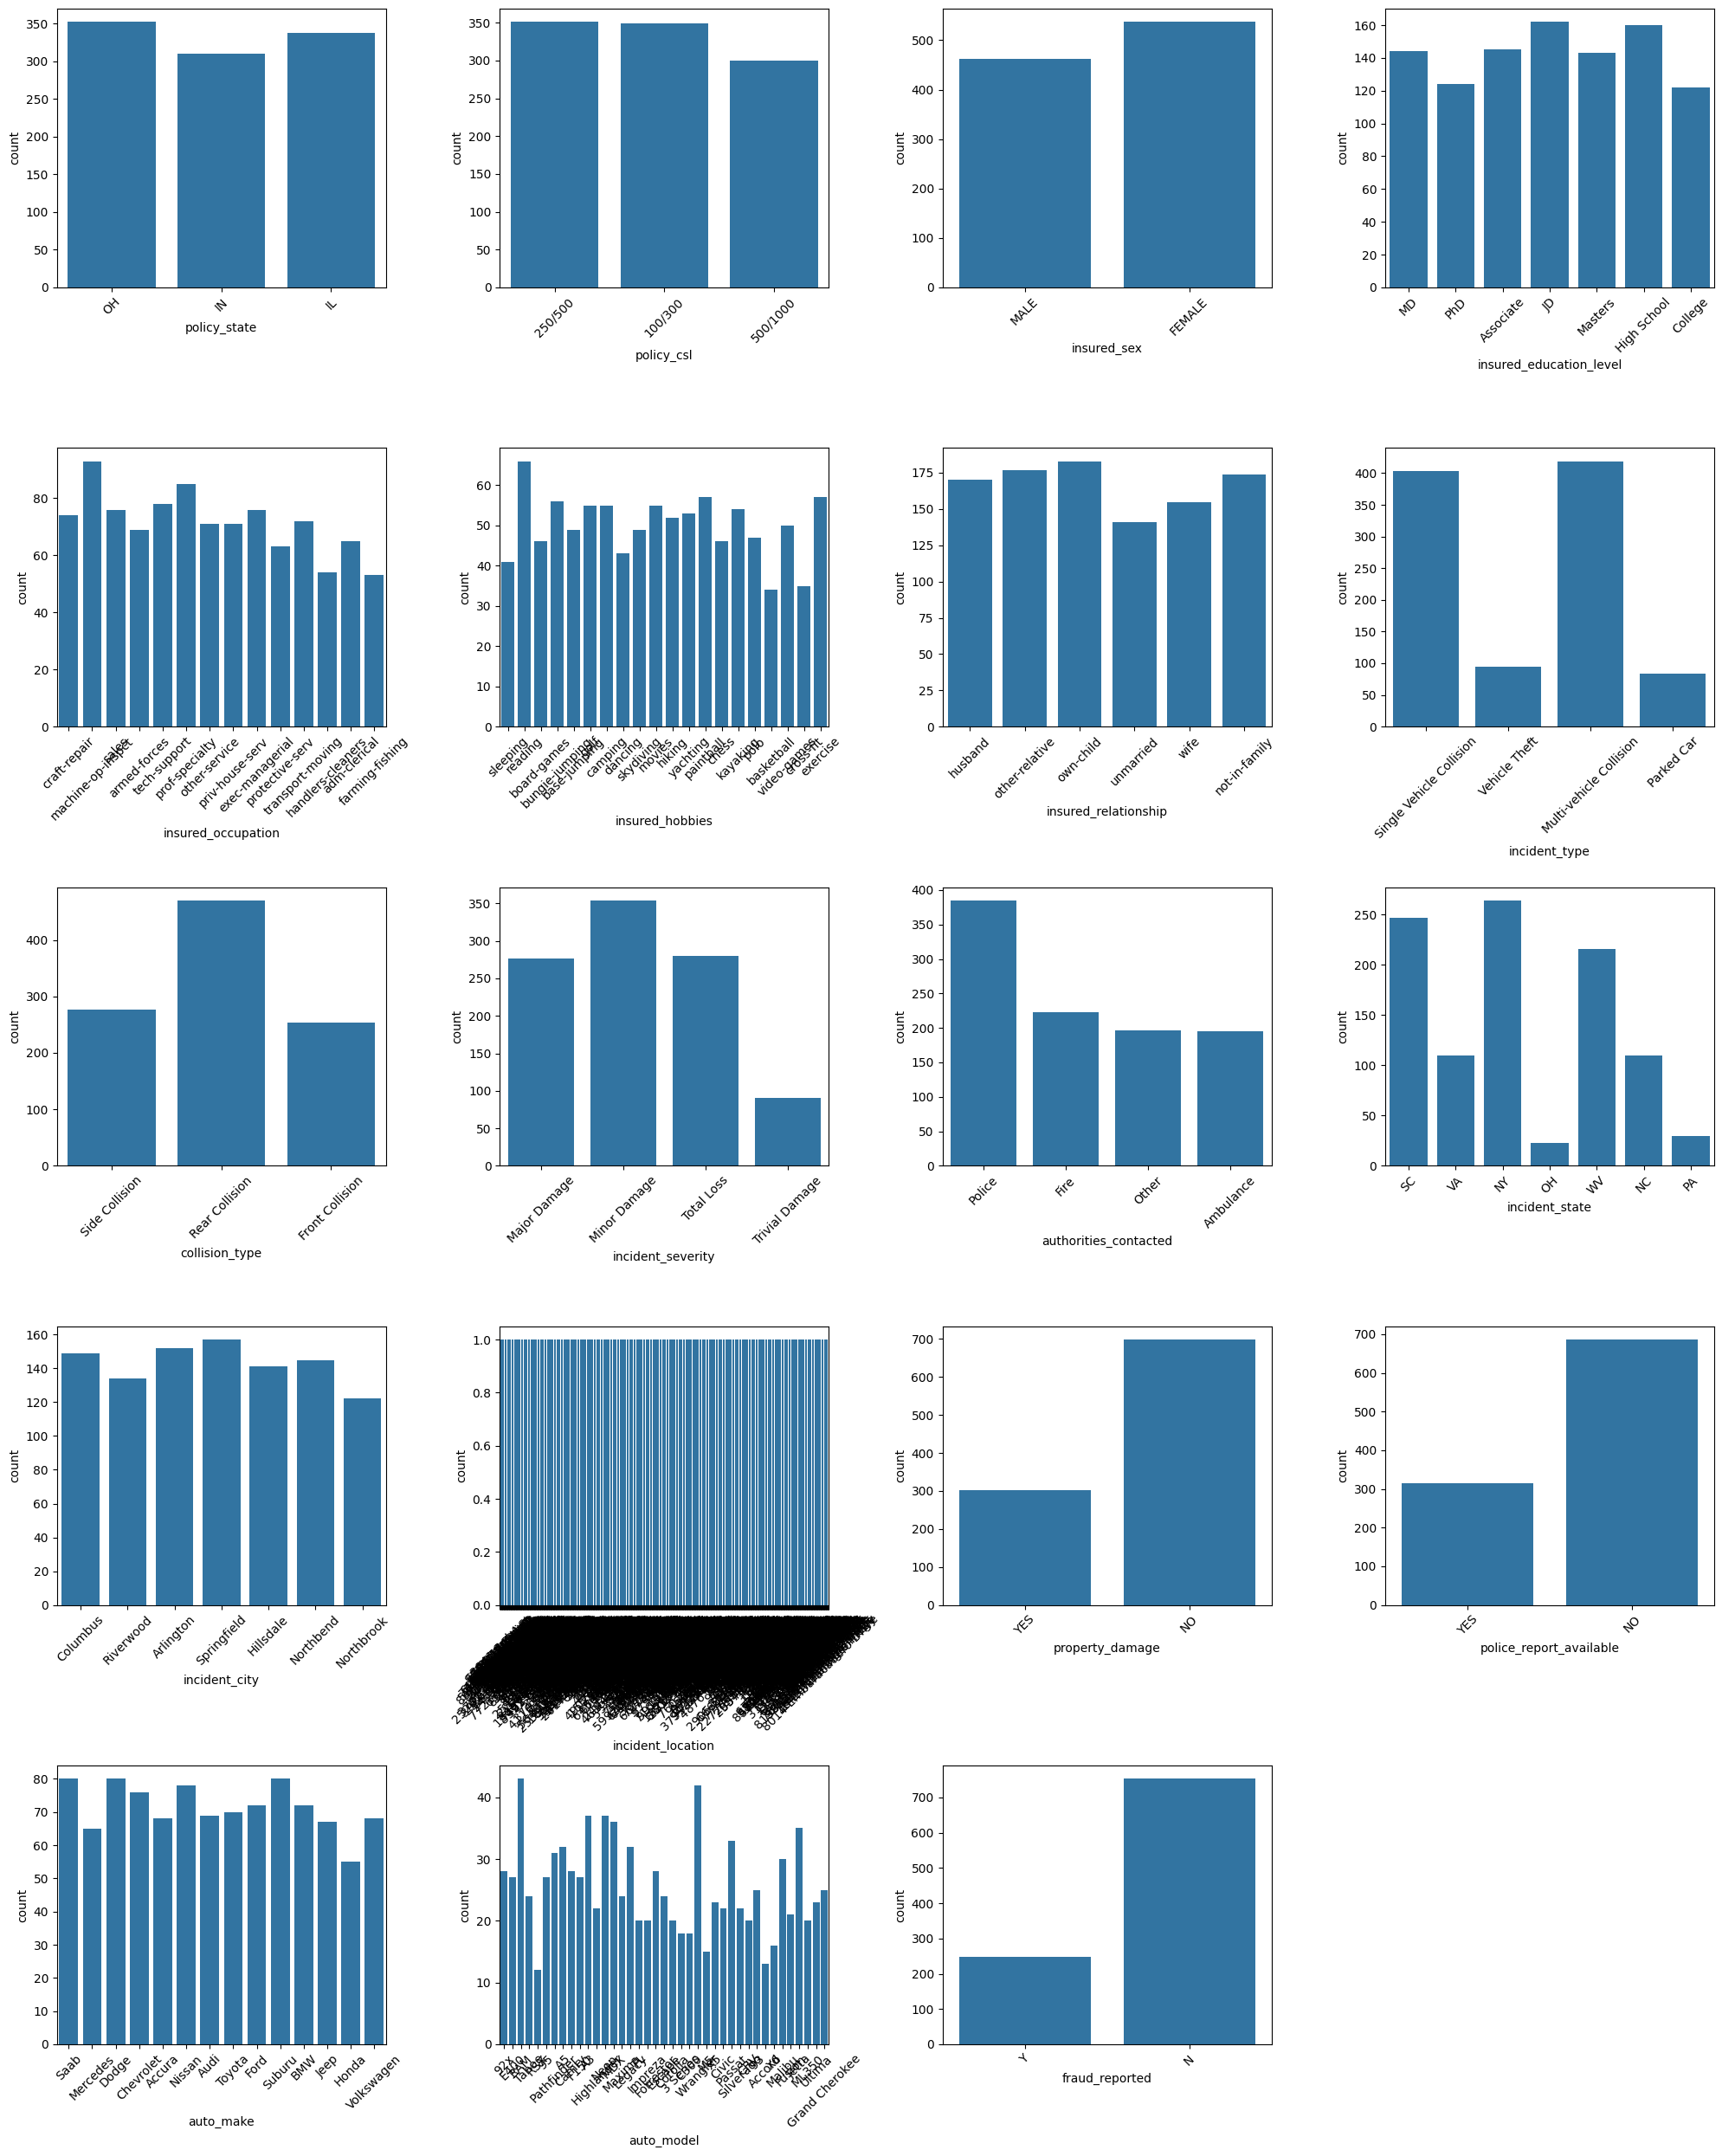

In [11]:
import math

# Count of categorical columns
num_categorical_columns = len(categorical_columns)

# Define the number of rows and columns for the subplots grid
num_rows = math.ceil(num_categorical_columns / 4)
num_cols = 4

# Plot countplots for categorical columns
plt.figure(figsize=(20, num_rows * 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=insurance_data, x=column)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


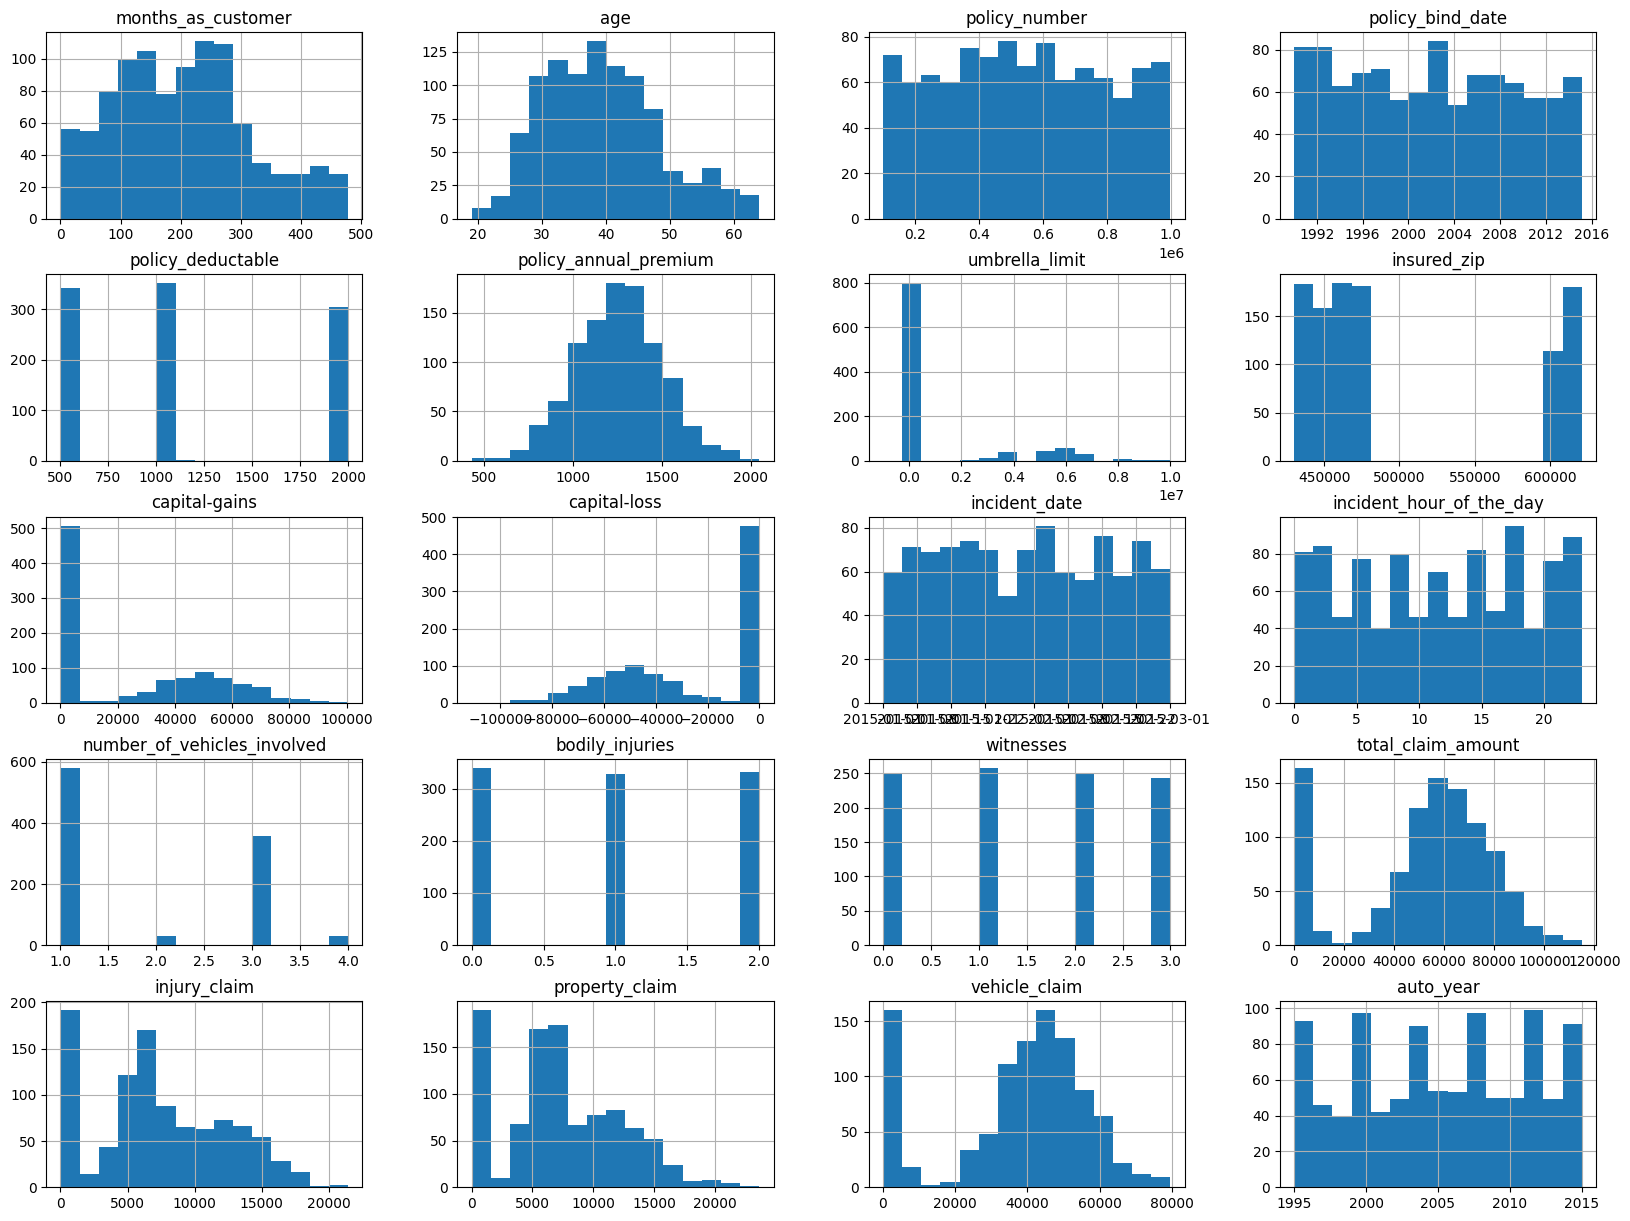

ValueError: num must be an integer with 1 <= num <= 16, not 17

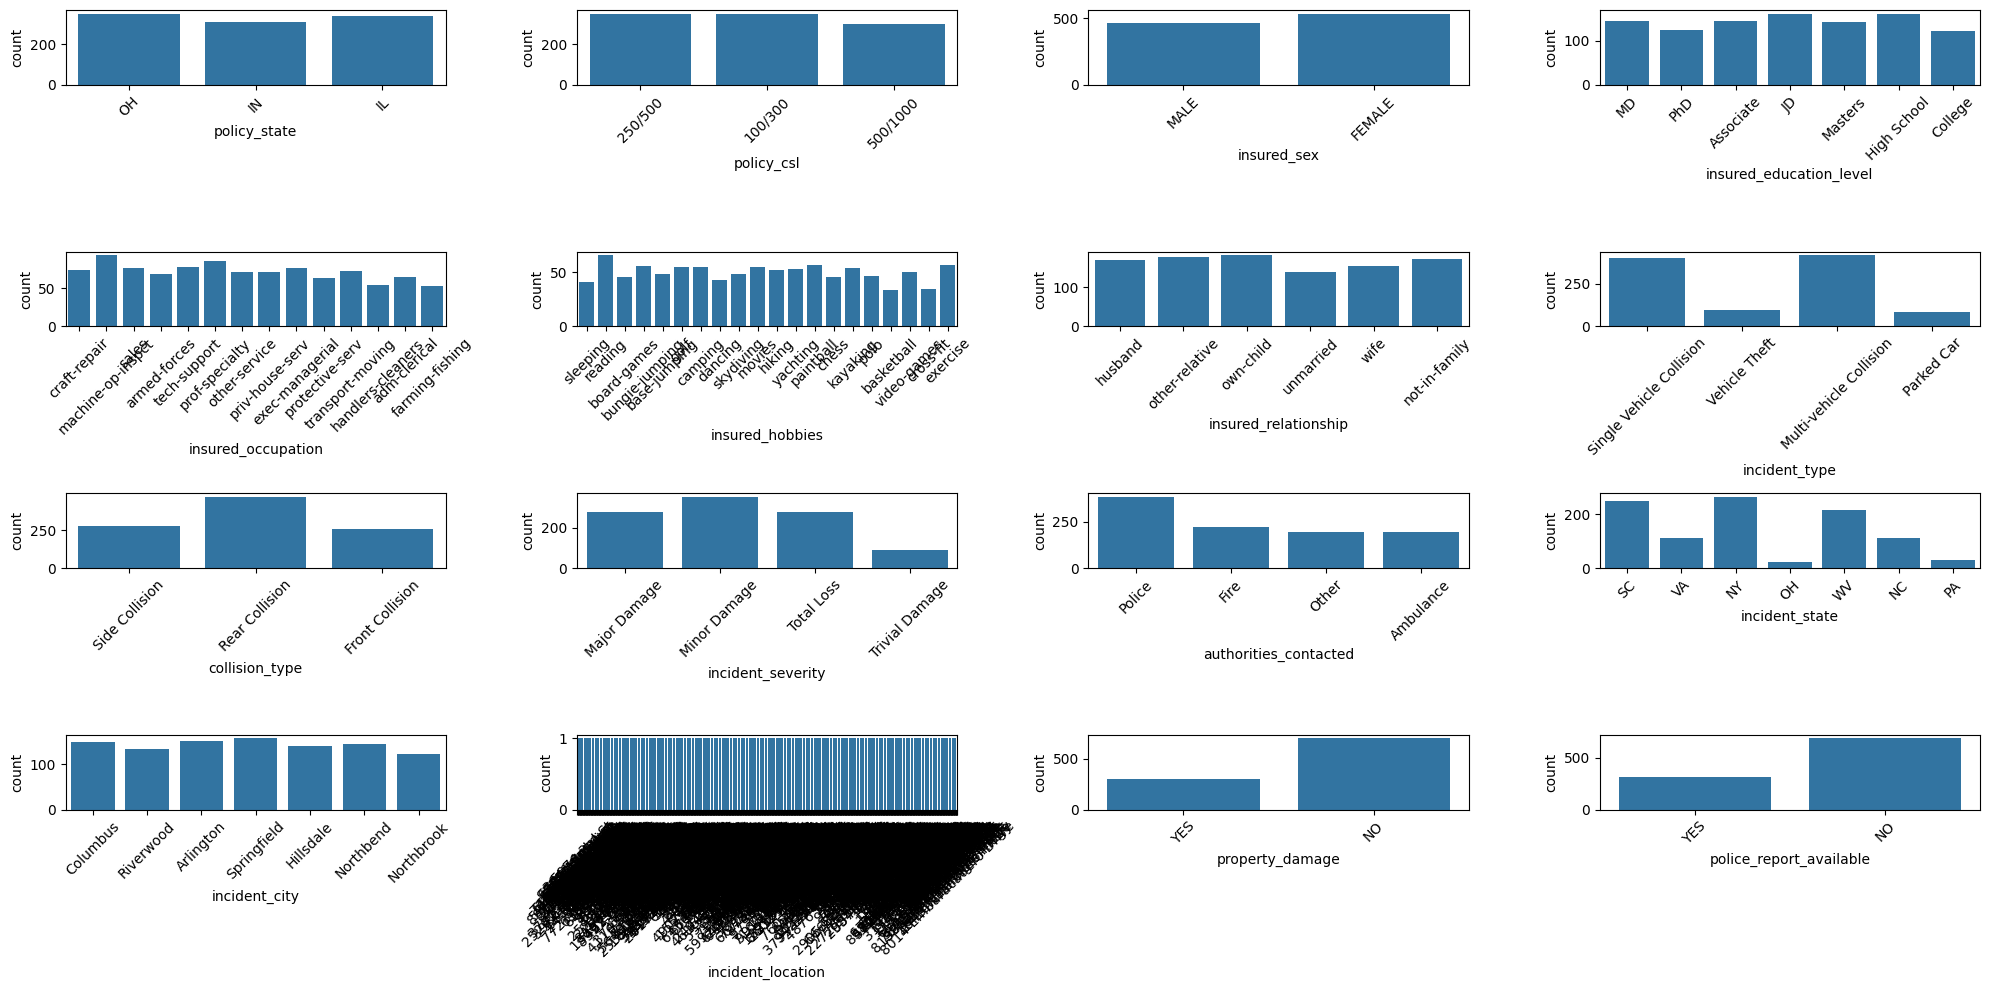

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numerical features
insurance_data.hist(bins=15, figsize=(20, 15))
plt.show()

# Countplot for categorical features
categorical_columns = insurance_data.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=insurance_data, x=column)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


## 2. Data Distribution
Understanding the distribution of numerical and categorical variables. This includes:

Numerical data: Checking skewness and kurtosis.
Categorical data: Visualizing the frequency counts.
2.1 Numerical Data Distribution

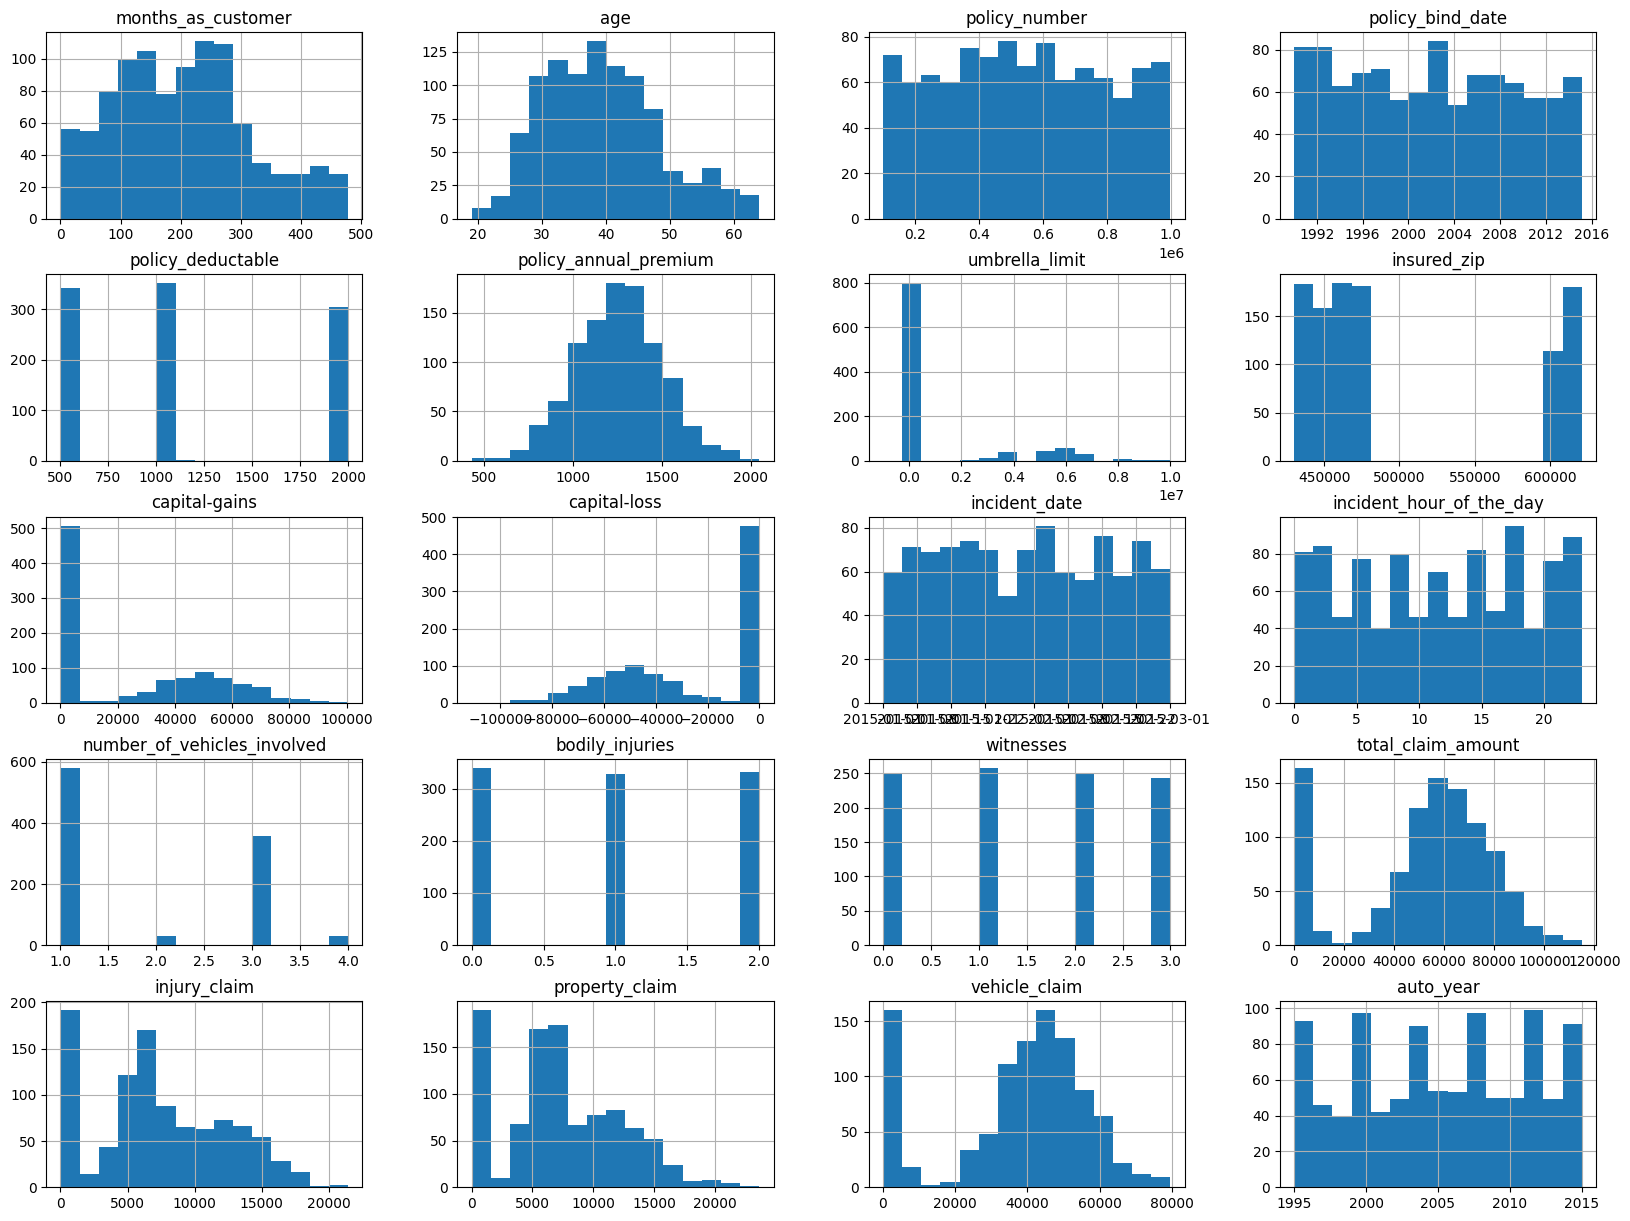

In [13]:
import matplotlib.pyplot as plt

# Histogram for numerical features
insurance_data.hist(bins=15, figsize=(20, 15))
plt.show()


ValueError: num must be an integer with 1 <= num <= 16, not 17

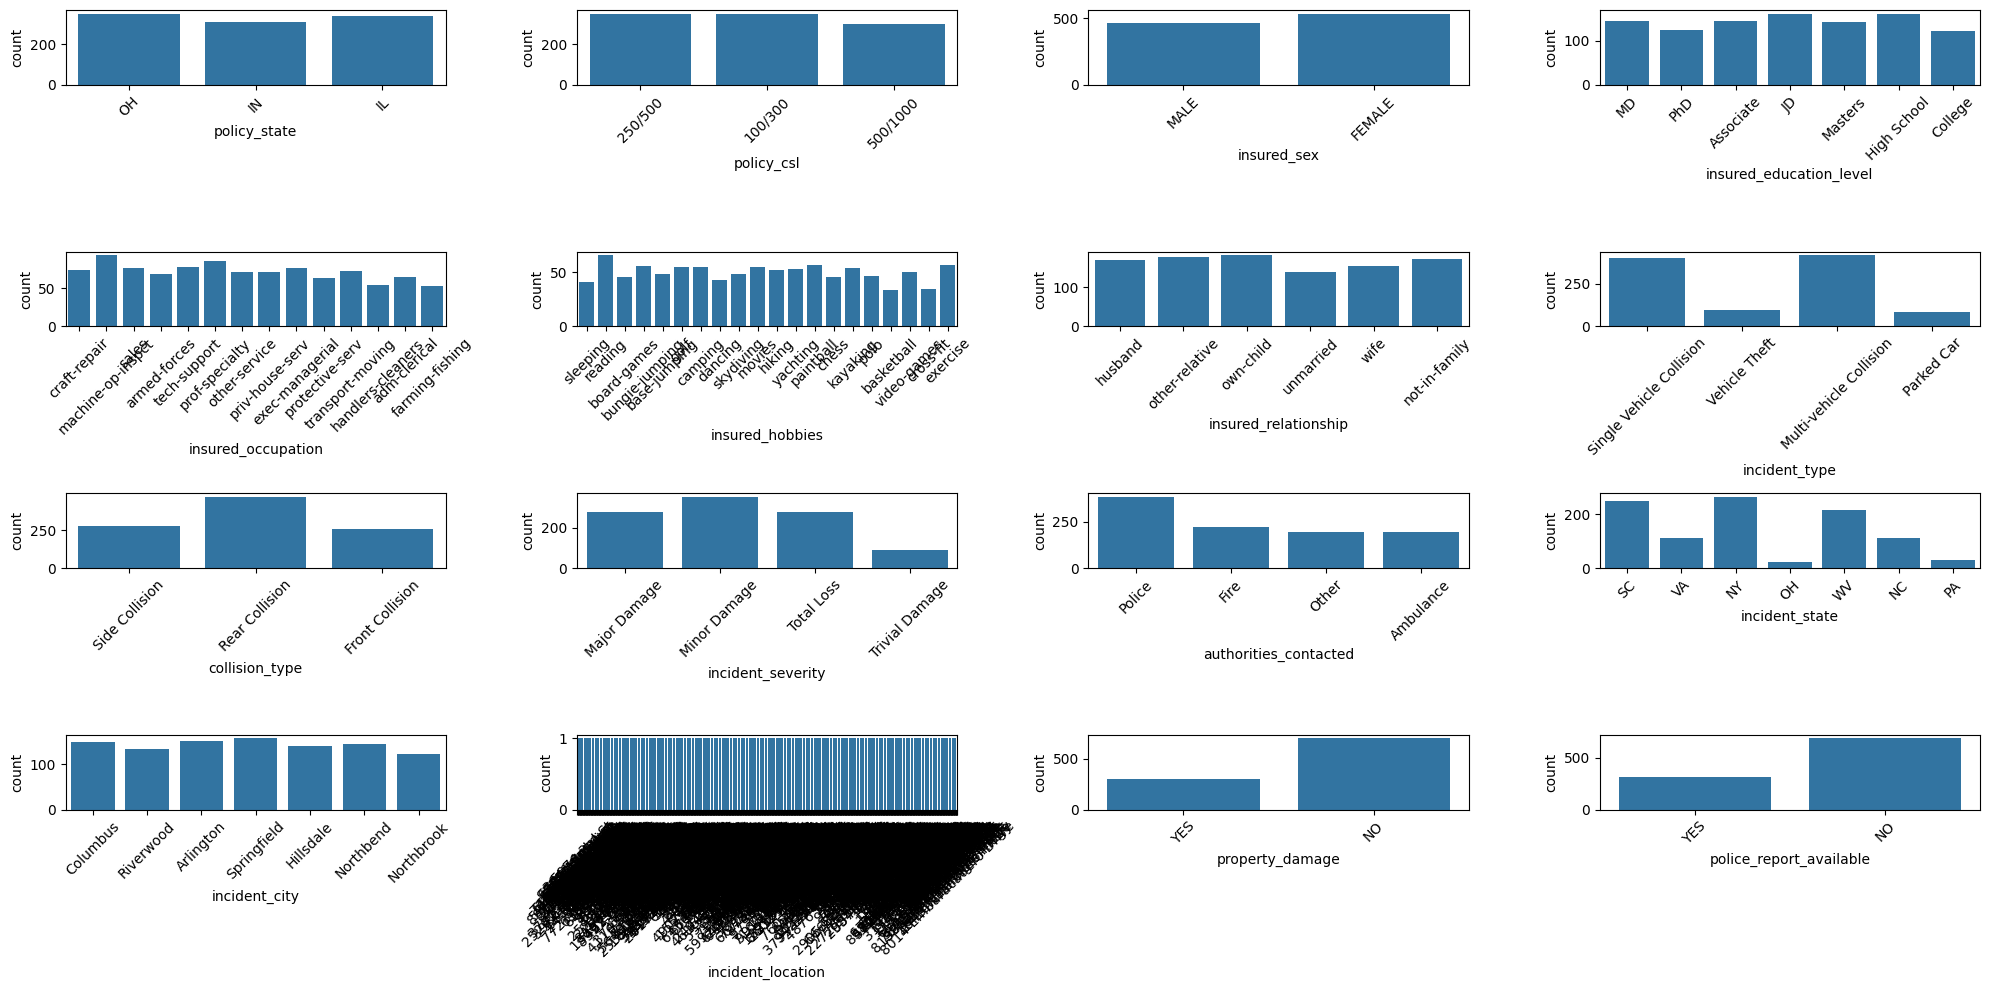

In [15]:
import seaborn as sns

# Countplot for categorical features
categorical_columns = insurance_data.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=insurance_data, x=column)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 16, not 17

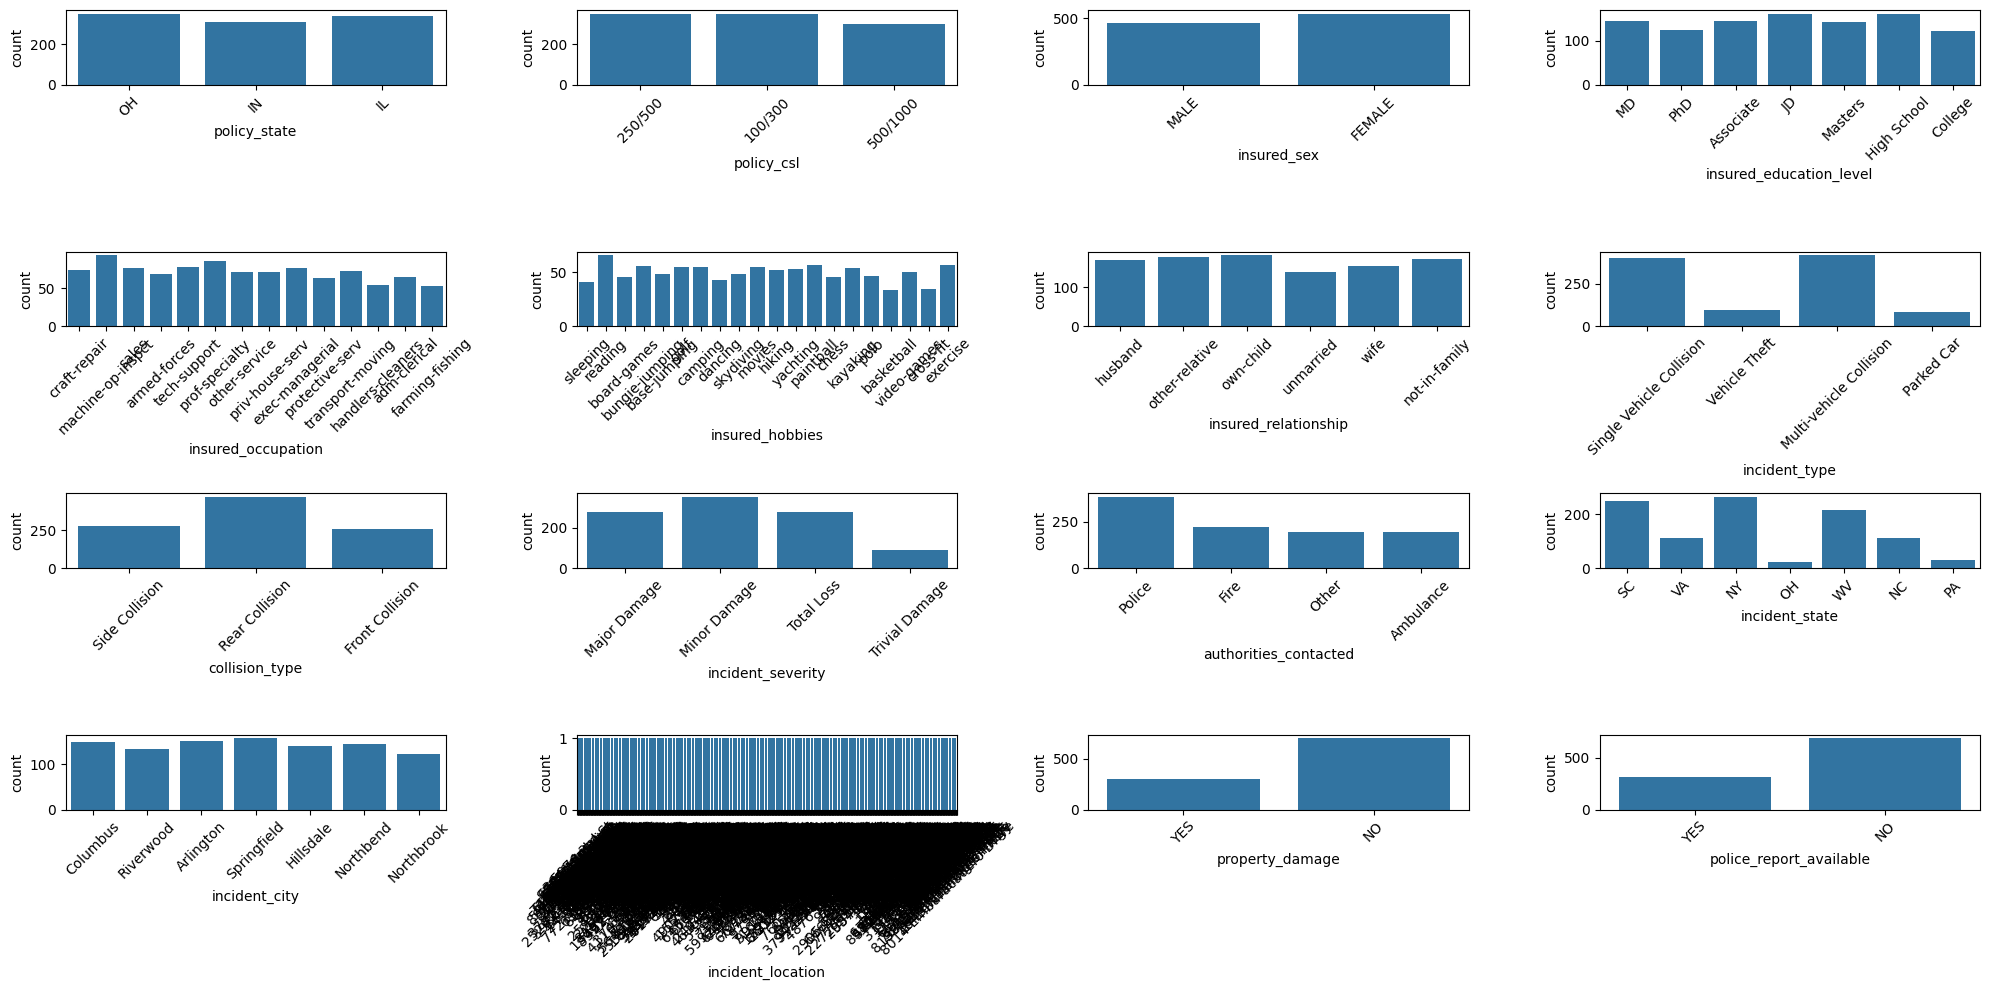

In [16]:
import seaborn as sns

# Countplot for categorical features
categorical_columns = insurance_data.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=insurance_data, x=column)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


### 2.2 Categorical Data Distribution

ValueError: num must be an integer with 1 <= num <= 16, not 17

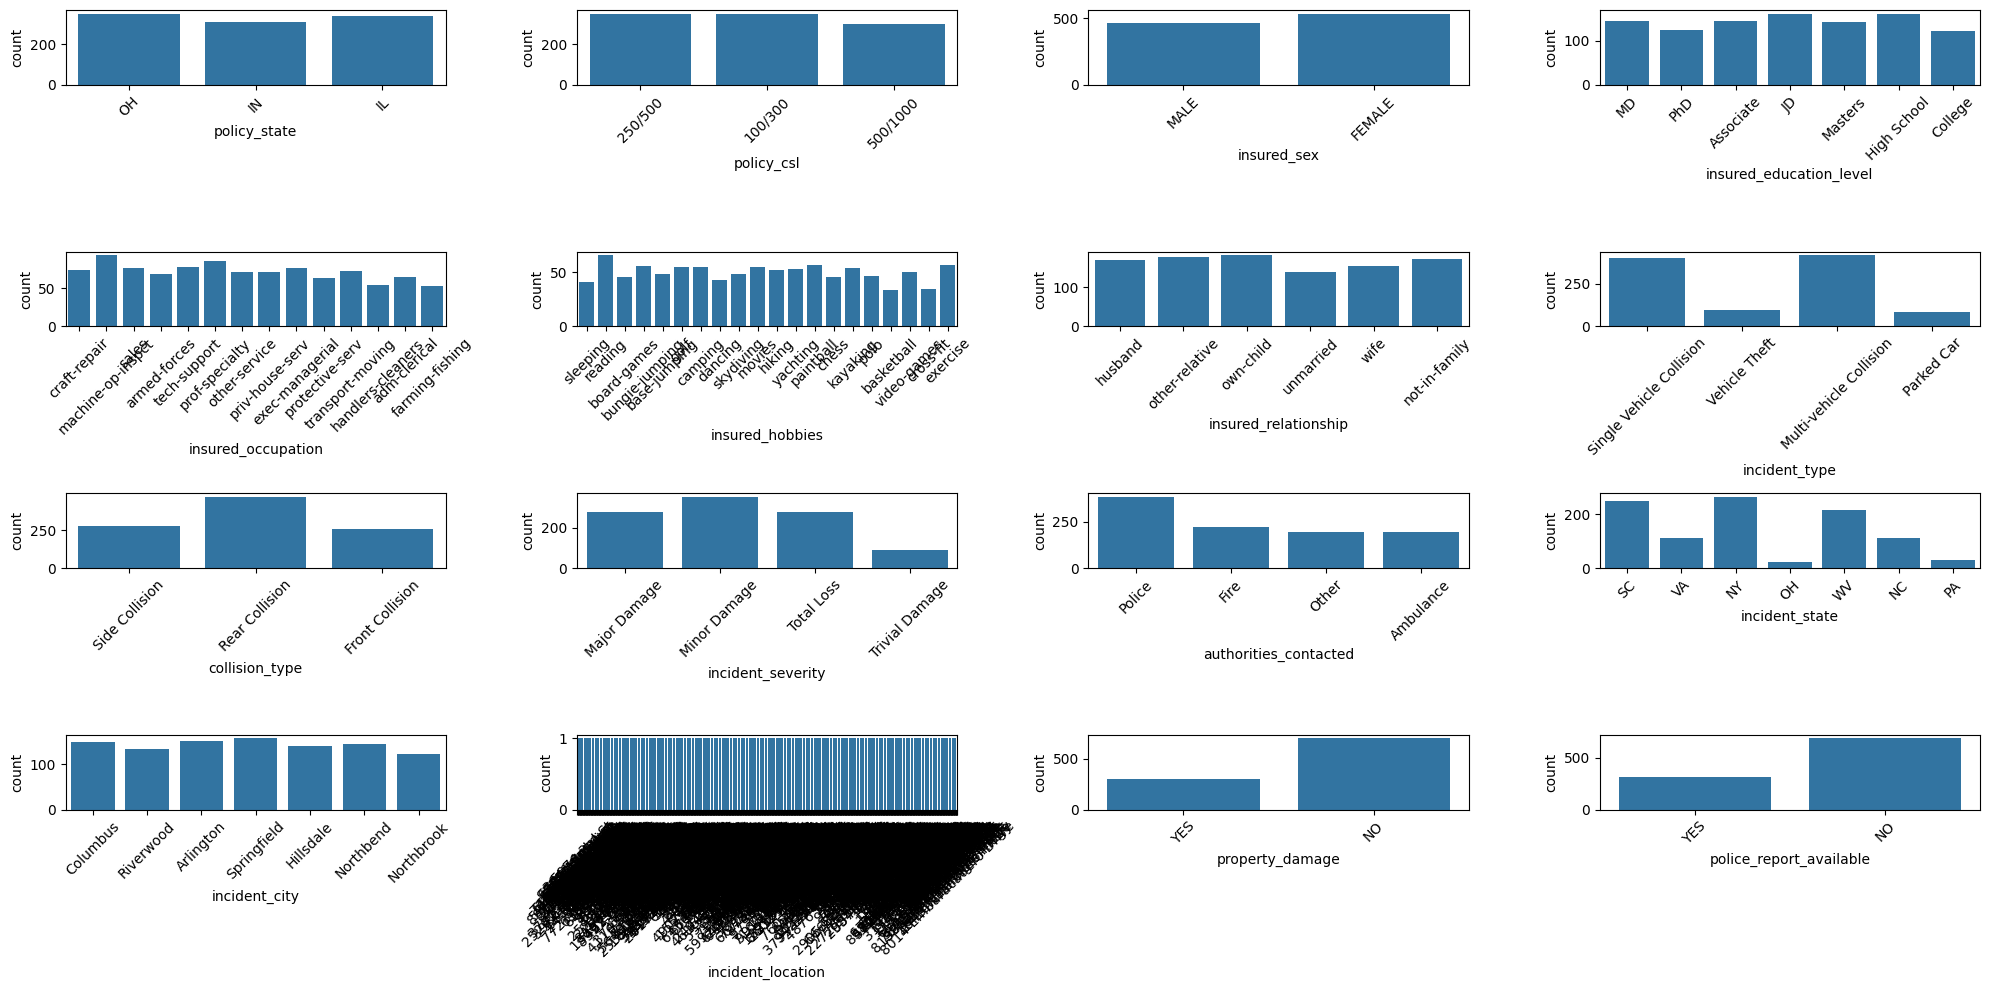

In [17]:
import seaborn as sns

# Countplot for categorical features
categorical_columns = insurance_data.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=insurance_data, x=column)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


### 3. Correlation Analysis
Correlation helps to identify relationships between numerical variables that may be predictive of the outcome.

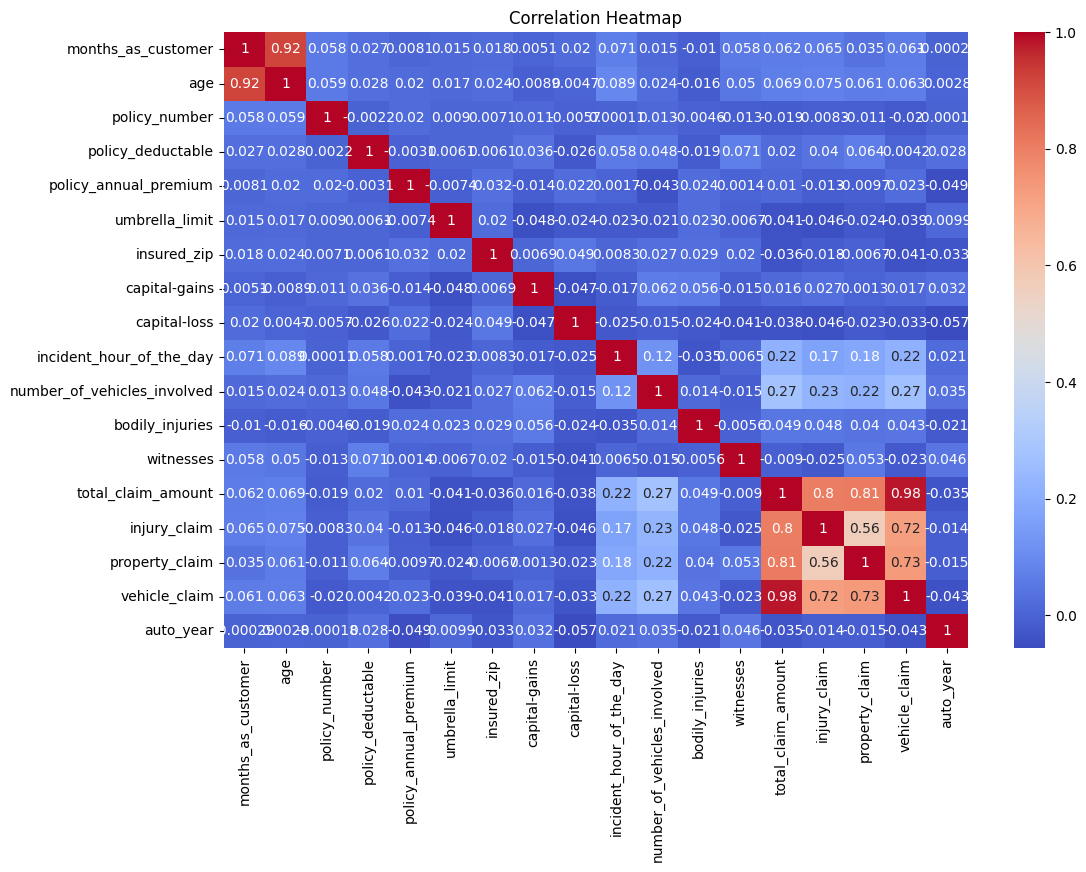

In [19]:
# Select only numeric columns for correlation analysis
numeric_columns = insurance_data.select_dtypes(include=['number'])

# Correlation matrix for numerical features
corr_matrix = numeric_columns.corr()

# Heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



### 4. Outlier Detection
Outliers can distort the analysis and model performance. We will use boxplots and interquartile range (IQR) to detect and handle outliers.

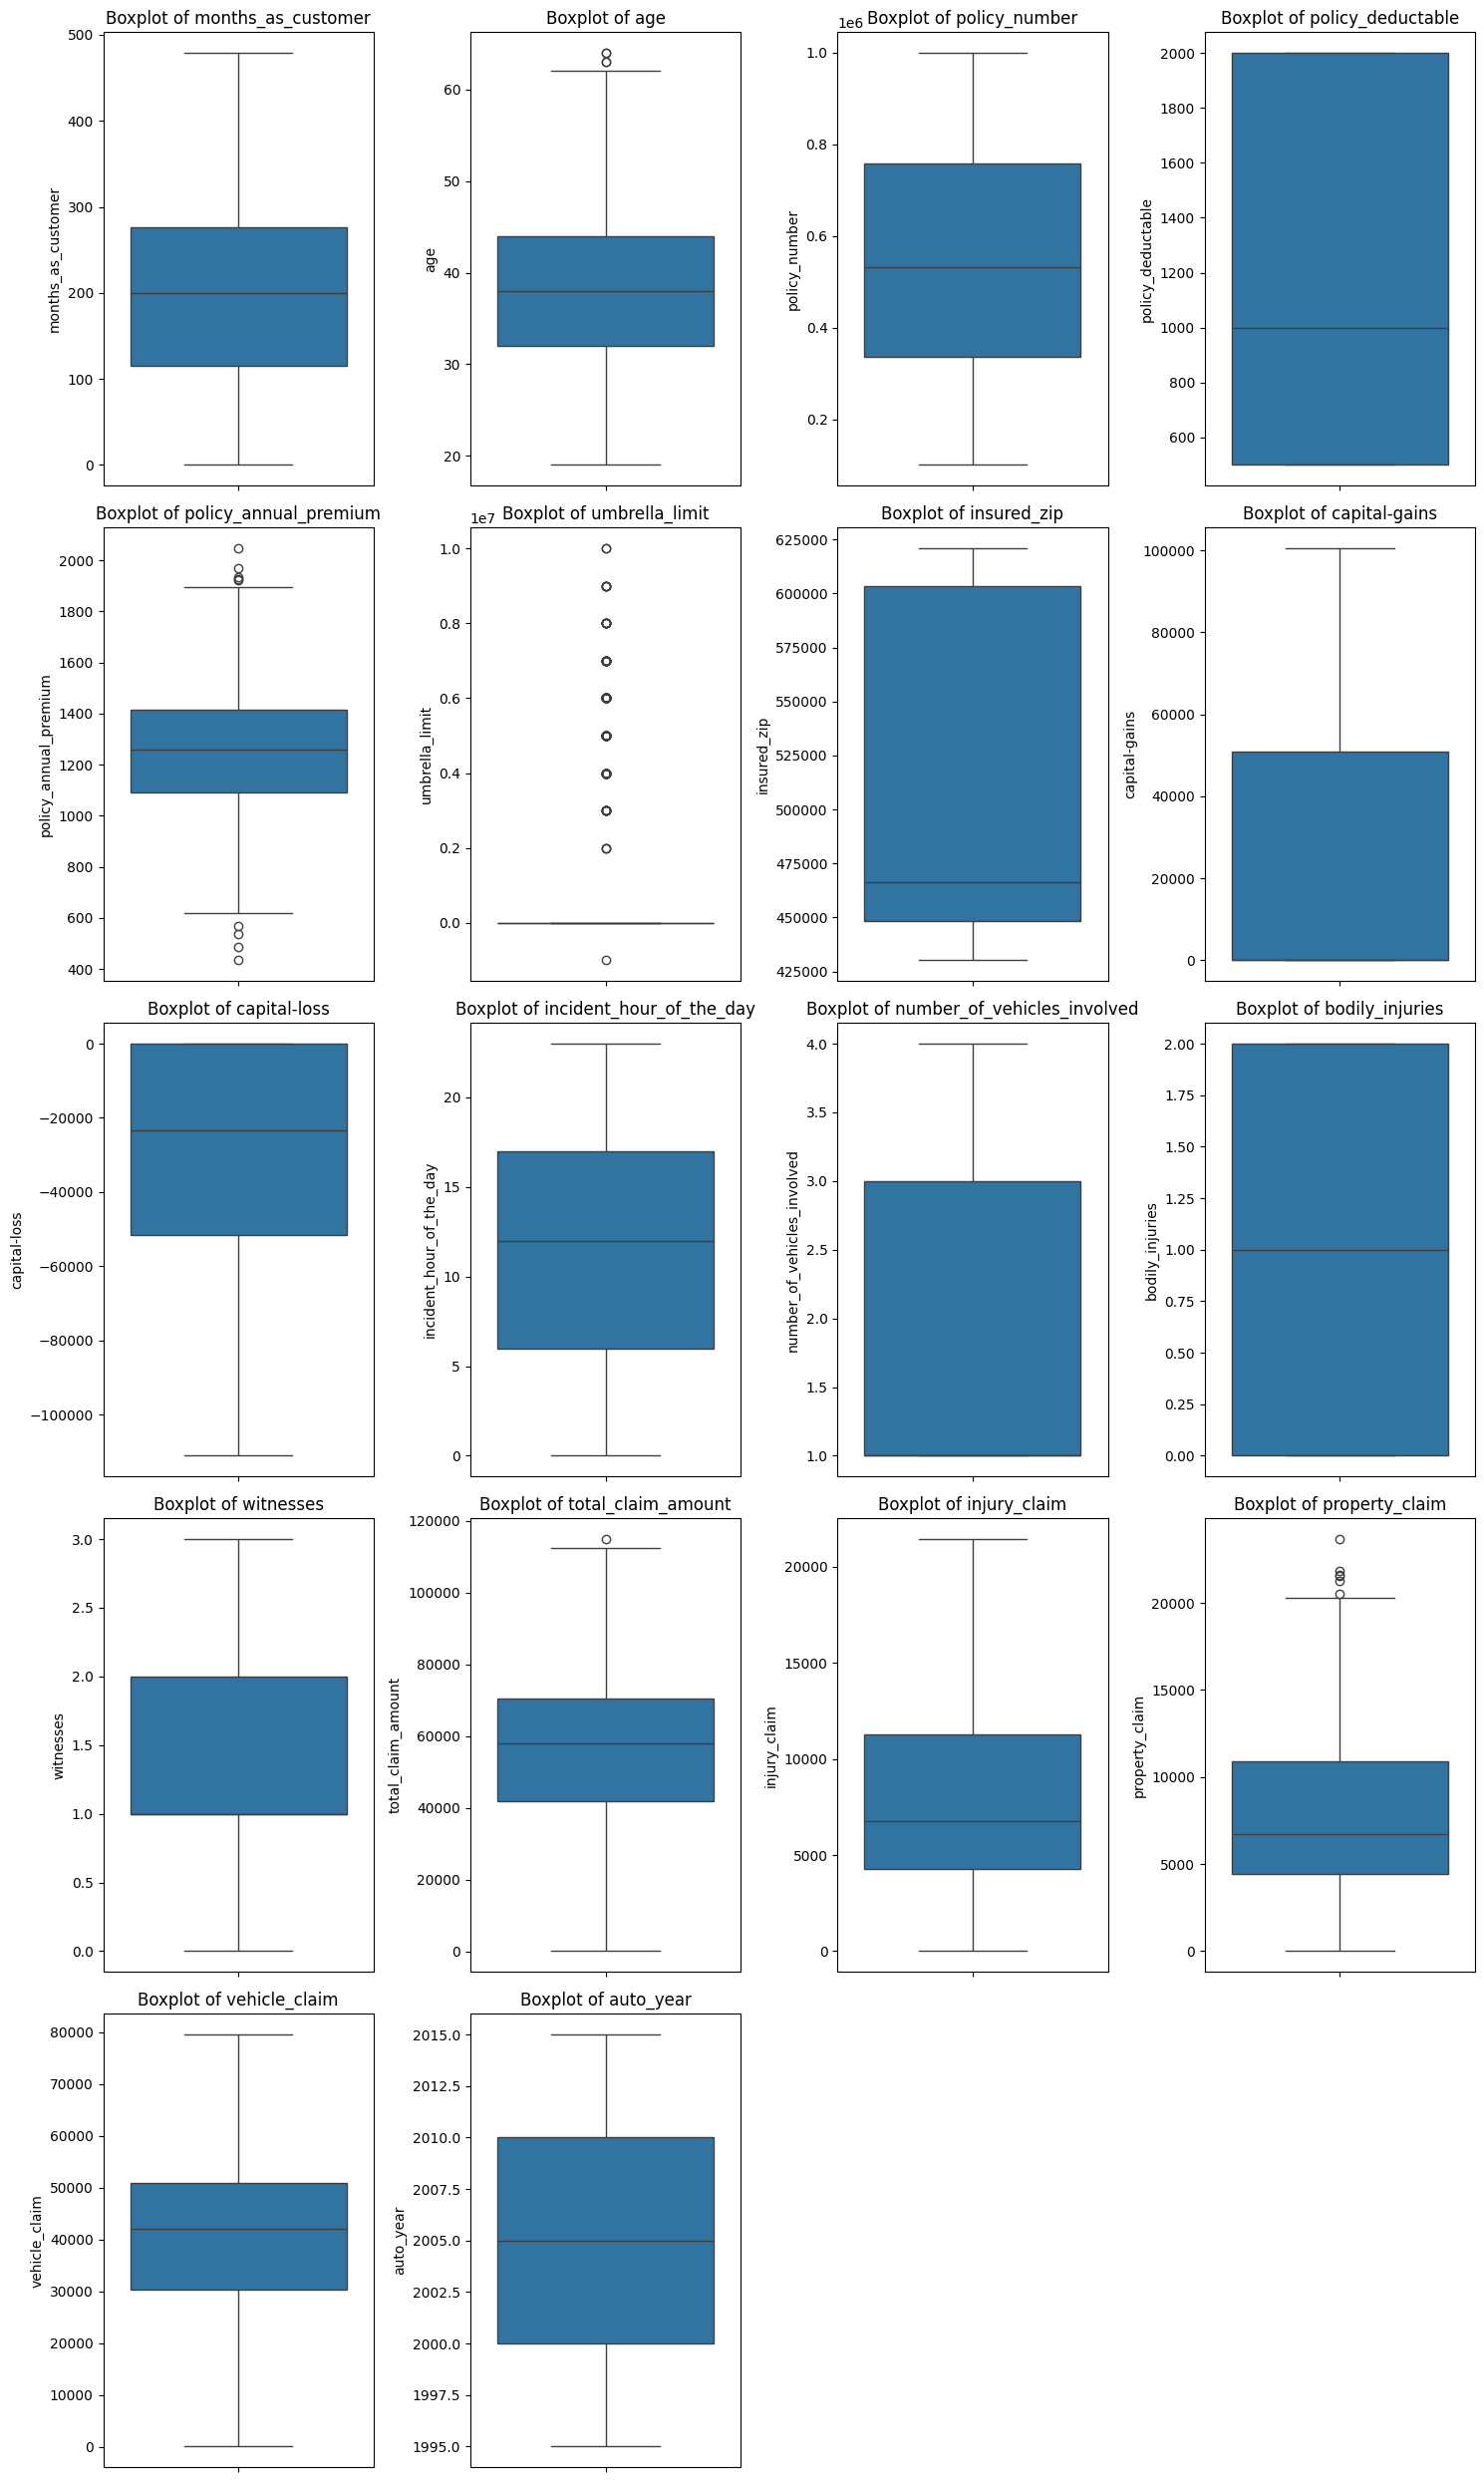

In [28]:
import math

# Select numerical columns
numeric_columns = insurance_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
num_cols = 4  # Fixed number of columns
num_rows = math.ceil(len(numeric_columns) / num_cols)  # Dynamic number of rows

# Create boxplots for numerical columns
plt.figure(figsize=(15, num_rows * 5))  # Adjust height dynamically based on num_rows
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=insurance_data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

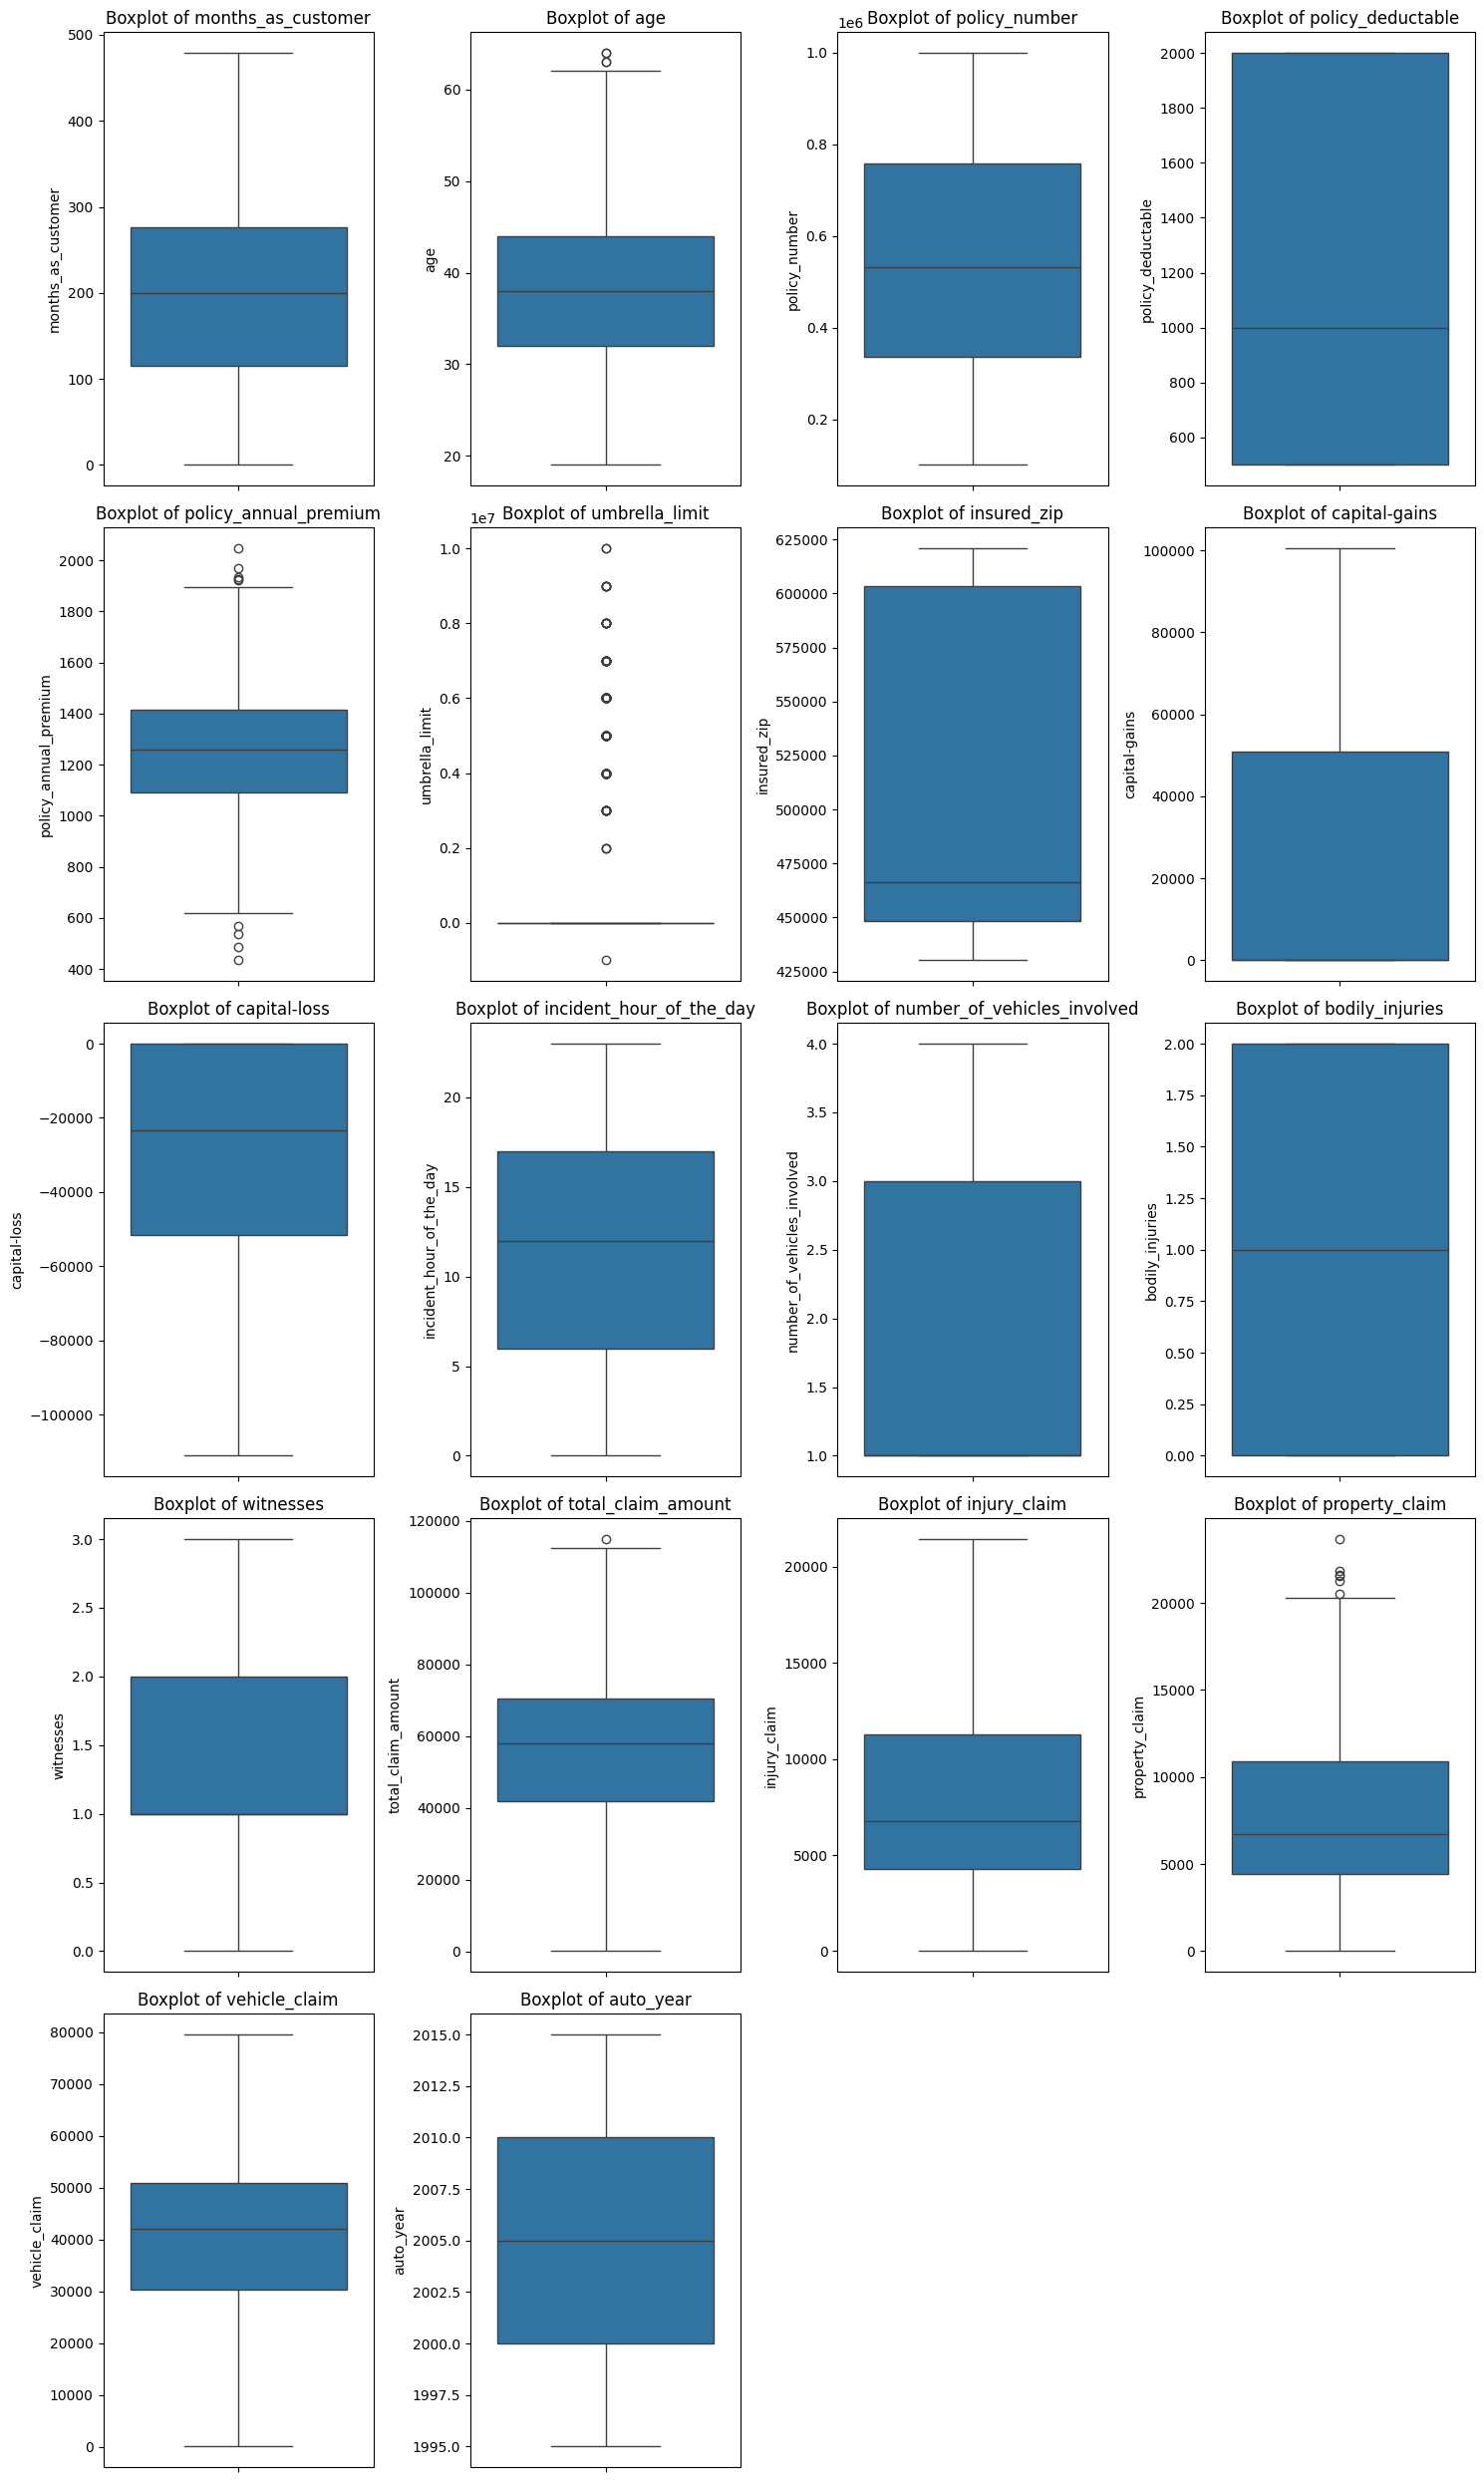

In [30]:
import math

# Select numerical columns
numeric_columns = insurance_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
num_cols = 4  # Fixed number of columns
num_rows = math.ceil(len(numeric_columns) / num_cols)  # Dynamic number of rows

# Create boxplots for numerical columns
plt.figure(figsize=(15, num_rows * 5))  # Adjust height dynamically based on num_rows
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=insurance_data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()
